In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from footprint_tune import combo_dust_fp
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import hpid2RaDec

import pandas as pd
import sqlite3
from scipy.stats import binned_statistic

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint note not like "DD%" for columns ['night', 'fieldRA', 'fieldDec']
Found 1947736 visits
Running:  ['opsim_Count_night_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 614.846  dipole: lon: -72.8243, lat: -85.605, amp: 250.797
  mono, lon, lat, amp


Plotting complete.


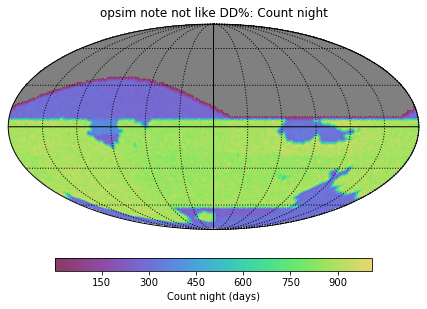

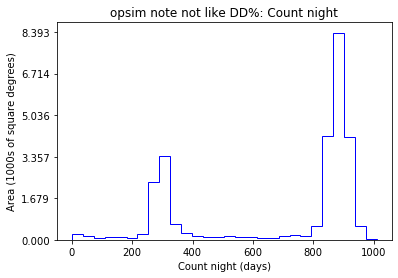

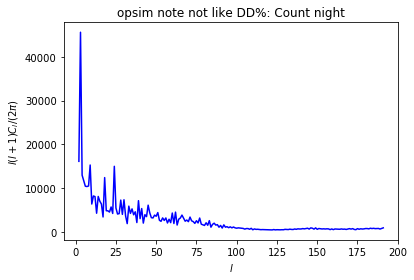

In [3]:
nside=64
dbFile = 'footprint_4_v1.6.1_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

bundleList = []
sql = 'note not like "DD%"'
metric = metrics.CountMetric(col='night')
slicer = slicers.HealpixSlicer(nside=nside)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()                

bg.plotAll(closefigs=False)

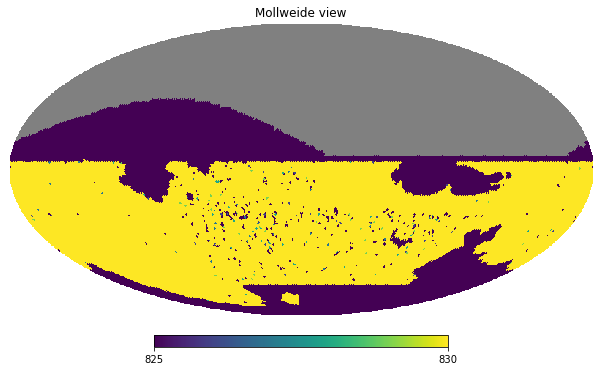

In [7]:
hp.mollview(bundleList[0].metricValues, min=825, max=830)

In [9]:
pixarea = hp.nside2pixarea(nside, degrees=True)
wfd_area = np.where(bundleList[0].metricValues >= 825)[0].size*pixarea
wfd_area

17456.46852674706